# Combined Bar Chart - Text-Vision CVCL vs CLIP Across Same-Class Discrimination Tests

This notebook creates a horizontal bar chart comparing model performance across SCDC (color), SCDS (size), and SCDT (texture) discrimination tests using text-vision alignment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Path setup
REPO_ROOT = r'C:\Users\jbats\Projects\NTU-Synthetic'
RESULTS_DIR = os.path.join(REPO_ROOT, 'PatrickProject', 'Chart_Generation', 'Textvision')

# Load all three CSV files
scdc_df = pd.read_csv(os.path.join(RESULTS_DIR, 'scdc_textvision_perclass_summary.csv'))
scds_df = pd.read_csv(os.path.join(RESULTS_DIR, 'scds_textvision_perclass_summary.csv'))
scdt_df = pd.read_csv(os.path.join(RESULTS_DIR, 'scdt_textvision_perclass_summary.csv'))

print("Loaded text-vision data:")
print(f"SCDC shape: {scdc_df.shape}")
print(f"SCDS shape: {scds_df.shape}")
print(f"SCDT shape: {scdt_df.shape}")

# Check columns
print("\nColumns in SCDC:")
print(scdc_df.columns.tolist())
print("\nFirst few rows of SCDC:")
print(scdc_df.head())

Loaded text-vision data:
SCDC shape: (134, 8)
SCDS shape: (134, 8)
SCDT shape: (134, 8)

Columns in SCDC:
['model', 'class', 'mean_accuracy', 'std', 'se', 'ci95', 'n_seeds', 'total_trials']

First few rows of SCDC:
          model     class  mean_accuracy       std        se      ci95  \
0  cvcl-resnext      lock       0.222222  0.004811  0.002778  0.005444   
1  cvcl-resnext  headband       0.225000  0.030046  0.017347  0.034001   
2  cvcl-resnext    muffin       0.219444  0.012729  0.007349  0.014405   
3  cvcl-resnext   trumpet       0.227778  0.033679  0.019444  0.038111   
4  cvcl-resnext    helmet       0.233333  0.058333  0.033679  0.066010   

   n_seeds  total_trials  
0        3          1500  
1        3          1500  
2        3          1500  
3        3          1500  
4        3          1500  


In [2]:
# Calculate statistics for each test and model
def calculate_stats(df, test_name):
    """Calculate mean and std for each model in a test."""
    stats = {}
    
    for model in df['model'].unique():
        model_data = df[df['model'] == model]['mean_accuracy'].values
        
        # Calculate overall mean and standard error
        mean_acc = np.mean(model_data) * 100  # Convert to percentage
        std_acc = np.std(model_data) * 100
        
        # Standard error for error bars
        n_samples = len(model_data)
        se = std_acc / np.sqrt(n_samples)
        ci95 = 1.96 * se  # 95% confidence interval
        
        stats[model] = {
            'mean': mean_acc,
            'std': std_acc,
            'se': se,
            'ci95': ci95,
            'n': n_samples
        }
    
    return stats

# Calculate stats for each test
scdc_stats = calculate_stats(scdc_df, 'SCDC (Color)')
scds_stats = calculate_stats(scds_df, 'SCDS (Size)')
scdt_stats = calculate_stats(scdt_df, 'SCDT (Texture)')

# Print summary
print("Text-Vision Summary Statistics:\n")
print("SCDC (Color Discrimination):")
for model, stats in scdc_stats.items():
    print(f"  {model}: {stats['mean']:.1f}% ± {stats['ci95']:.1f}%")

print("\nSCDS (Size Discrimination):")
for model, stats in scds_stats.items():
    print(f"  {model}: {stats['mean']:.1f}% ± {stats['ci95']:.1f}%")

print("\nSCDT (Texture Discrimination):")
for model, stats in scdt_stats.items():
    print(f"  {model}: {stats['mean']:.1f}% ± {stats['ci95']:.1f}%")

Text-Vision Summary Statistics:

SCDC (Color Discrimination):
  cvcl-resnext: 24.2% ± 0.8%
  clip-res: 96.5% ± 0.9%

SCDS (Size Discrimination):
  cvcl-resnext: 26.3% ± 1.5%
  clip-res: 30.6% ± 1.3%

SCDT (Texture Discrimination):
  cvcl-resnext: 27.9% ± 1.9%
  clip-res: 28.3% ± 1.4%


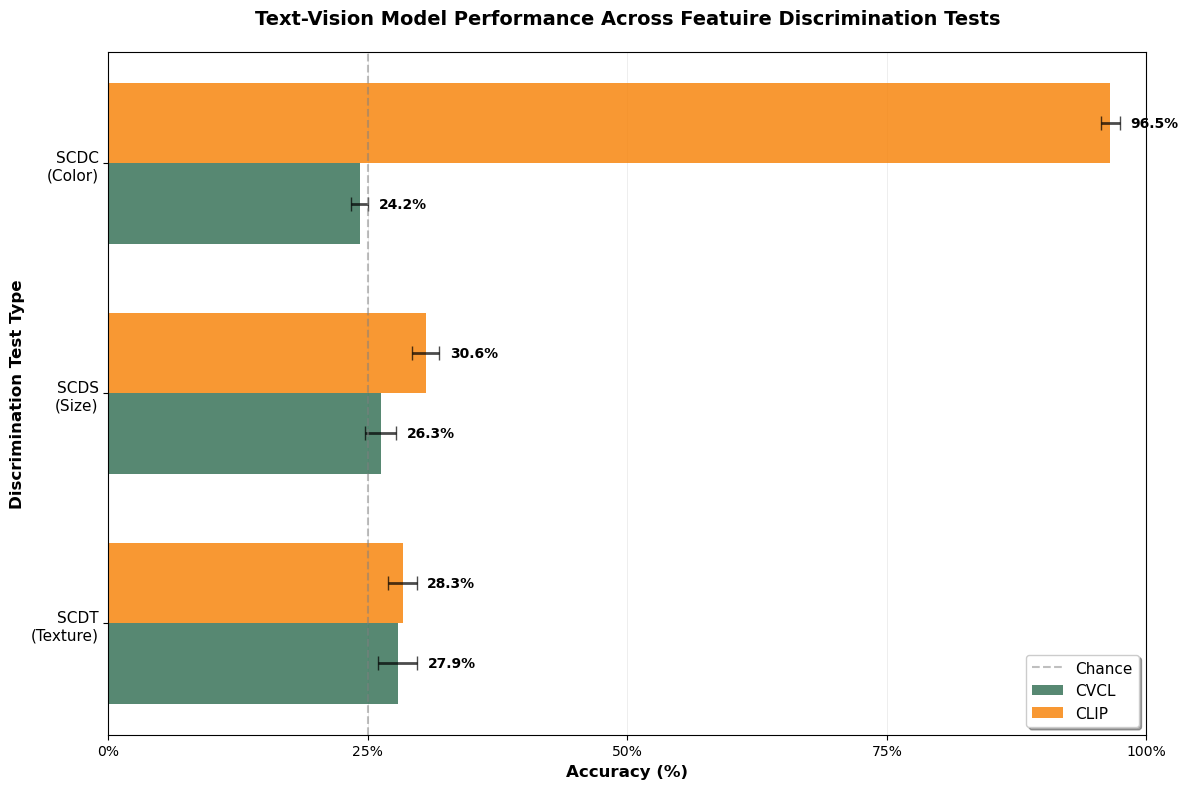


Figure saved as:
  - C:\Users\jbats\Projects\NTU-Synthetic\PatrickProject\Chart_Generation\Textvision\textvision_combined_discrimination_results.png
  - C:\Users\jbats\Projects\NTU-Synthetic\PatrickProject\Chart_Generation\Textvision\textvision_combined_discrimination_results.pdf


In [5]:
# Create horizontal bar chart with error bars
fig, ax = plt.subplots(figsize=(12, 8))

# Setup data for plotting
tests = ['SCDT\n(Texture)', 'SCDS\n(Size)', 'SCDC\n(Color)']  # Reversed for bottom-to-top
test_stats = [scdt_stats, scds_stats, scdc_stats]  # Match order

# Model colors - consistent with your notebooks
colors = {
    'cvcl-resnext': '#2d6a4f',  
    'clip-res': '#f77f00'  
}

# Bar settings
bar_height = 0.35
y_positions = np.arange(len(tests))

# Plot bars for each model
for i, (test_name, stats) in enumerate(zip(tests, test_stats)):
    # CVCL bar
    if 'cvcl-resnext' in stats:
        cvcl_mean = stats['cvcl-resnext']['mean']
        cvcl_error = stats['cvcl-resnext']['ci95']
        ax.barh(y_positions[i] - bar_height/2, cvcl_mean, bar_height,
                xerr=cvcl_error, 
                color=colors['cvcl-resnext'],
                alpha=0.8,
                label='CVCL' if i == 0 else None,
                capsize=5,
                error_kw={'linewidth': 2, 'ecolor': 'black', 'alpha': 0.7})
        
        # Add value label
        ax.text(cvcl_mean + cvcl_error + 1, y_positions[i] - bar_height/2, 
                f'{cvcl_mean:.1f}%', 
                va='center', fontsize=10, fontweight='bold')
    
    # CLIP bar
    if 'clip-res' in stats:
        clip_mean = stats['clip-res']['mean']
        clip_error = stats['clip-res']['ci95']
        ax.barh(y_positions[i] + bar_height/2, clip_mean, bar_height,
                xerr=clip_error,
                color=colors['clip-res'],
                alpha=0.8,
                label='CLIP' if i == 0 else None,
                capsize=5,
                error_kw={'linewidth': 2, 'ecolor': 'black', 'alpha': 0.7})
        
        # Add value label
        ax.text(clip_mean + clip_error + 1, y_positions[i] + bar_height/2, 
                f'{clip_mean:.1f}%', 
                va='center', fontsize=10, fontweight='bold')

# Formatting
ax.set_ylabel('Discrimination Test Type', fontsize=12, fontweight='bold')
ax.set_xlabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax.set_title('Text-Vision Model Performance Across Featuire Discrimination Tests', 
             fontsize=14, fontweight='bold', pad=20)

# Set y-axis
ax.set_yticks(y_positions)
ax.set_yticklabels(tests, fontsize=11)

# Set x-axis
ax.set_xlim(0, 100)
ax.set_xticks([0, 25, 50, 75, 100])
ax.set_xticklabels(['0%', '25%', '50%', '75%', '100%'])

# Add chance line
ax.axvline(x=25, color='gray', linestyle='--', alpha=0.5, linewidth=1.5, label='Chance')

# Grid
ax.grid(axis='x', alpha=0.3, linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

# Legend
ax.legend(loc='lower right', fontsize=11, frameon=True, fancybox=True, shadow=True)

# Adjust layout
plt.tight_layout()

# Save figure
plt.savefig(os.path.join(RESULTS_DIR, 'textvision_combined_discrimination_results.png'), 
            dpi=300, bbox_inches='tight', facecolor='white')
plt.savefig(os.path.join(RESULTS_DIR, 'textvision_combined_discrimination_results.pdf'), 
            bbox_inches='tight', facecolor='white')
plt.show()

print("\nFigure saved as:")
print(f"  - {os.path.join(RESULTS_DIR, 'textvision_combined_discrimination_results.png')}")
print(f"  - {os.path.join(RESULTS_DIR, 'textvision_combined_discrimination_results.pdf')}")

In [ ]:
# Create a summary table
summary_data = []

for test_name, stats in [('SCDC (Color)', scdc_stats), 
                          ('SCDS (Size)', scds_stats), 
                          ('SCDT (Texture)', scdt_stats)]:
    for model, model_stats in stats.items():
        summary_data.append({
            'Test': test_name,
            'Model': model.replace('-resnext', '').replace('-res', '').upper(),
            'Mean Accuracy (%)': f"{model_stats['mean']:.1f}",
            '95% CI': f"±{model_stats['ci95']:.1f}",
            'Std Dev (%)': f"{model_stats['std']:.1f}",
            'N Classes': model_stats['n']
        })

summary_df = pd.DataFrame(summary_data)
print("\nText-Vision Summary Table:")
print(summary_df.to_string(index=False))

# Save summary table
summary_path = os.path.join(RESULTS_DIR, 'textvision_discrimination_tests_summary.csv')
summary_df.to_csv(summary_path, index=False)
print(f"\nSummary saved to {summary_path}")

In [ ]:
# Statistical comparison - which model wins each test?
print("\n" + "="*60)
print("TEXT-VISION STATISTICAL COMPARISON")
print("="*60)

from scipy import stats as scipy_stats

for test_name, df in [('SCDC (Color)', scdc_df), 
                       ('SCDS (Size)', scds_df), 
                       ('SCDT (Texture)', scdt_df)]:
    
    cvcl_data = df[df['model'] == 'cvcl-resnext']['mean_accuracy'].values
    clip_data = df[df['model'] == 'clip-res']['mean_accuracy'].values
    
    # Paired t-test (since we're comparing the same classes)
    t_stat, p_value = scipy_stats.ttest_rel(cvcl_data, clip_data)
    
    cvcl_mean = np.mean(cvcl_data) * 100
    clip_mean = np.mean(clip_data) * 100
    diff = clip_mean - cvcl_mean
    
    print(f"\n{test_name}:")
    print(f"  CVCL: {cvcl_mean:.1f}%")
    print(f"  CLIP: {clip_mean:.1f}%")
    print(f"  Difference: {diff:+.1f}% ({'CLIP' if diff > 0 else 'CVCL'} better)")
    print(f"  p-value: {p_value:.6f}")
    
    if p_value < 0.001:
        print(f"  Result: ***Highly significant (p < 0.001)")
    elif p_value < 0.01:
        print(f"  Result: **Very significant (p < 0.01)")
    elif p_value < 0.05:
        print(f"  Result: *Significant (p < 0.05)")
    else:
        print(f"  Result: Not significant")
    
    # Effect size (Cohen's d)
    diff_mean = np.mean(clip_data - cvcl_data)
    diff_std = np.std(clip_data - cvcl_data)
    cohens_d = diff_mean / diff_std if diff_std > 0 else 0
    
    print(f"  Cohen's d: {cohens_d:.3f}")
    if abs(cohens_d) < 0.2:
        print("    (Negligible effect)")
    elif abs(cohens_d) < 0.5:
        print("    (Small effect)")
    elif abs(cohens_d) < 0.8:
        print("    (Medium effect)")
    else:
        print("    (Large effect)")

In [ ]:
# Create model comparison chart - which model is better at what?
fig, ax = plt.subplots(figsize=(10, 6))

# Calculate differences (CLIP - CVCL)
differences = []
test_labels = ['Color\n(SCDC)', 'Size\n(SCDS)', 'Texture\n(SCDT)']

for stats in [scdc_stats, scds_stats, scdt_stats]:
    diff = stats['clip-res']['mean'] - stats['cvcl-resnext']['mean']
    differences.append(diff)

# Create bars
x_pos = np.arange(len(test_labels))
colors_bar = ['#e63946' if d > 0 else '#2a9d8f' for d in differences]

bars = ax.bar(x_pos, differences, color=colors_bar, alpha=0.8, 
               edgecolor='black', linewidth=1.5)

# Add value labels
for i, diff in enumerate(differences):
    ax.text(i, diff + (1 if diff > 0 else -1), f'{diff:+.1f}%',
            ha='center', va='bottom' if diff > 0 else 'top', 
            fontsize=11, fontweight='bold')

# Formatting
ax.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax.set_ylabel('Performance Difference (%)\n(CLIP - CVCL)', fontsize=12, fontweight='bold')
ax.set_xlabel('Discrimination Test Type', fontsize=12, fontweight='bold')
ax.set_title('Text-Vision Model Performance Differences\nPositive = CLIP Better, Negative = CVCL Better',
             fontsize=13, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(test_labels, fontsize=11)
ax.set_ylim(min(differences) - 10, max(differences) + 10)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# Add annotations
ax.text(0.02, 0.98, 'CLIP excels at:', transform=ax.transAxes,
        fontsize=10, va='top', fontweight='bold', color='#e63946')
ax.text(0.02, 0.92, '• Color discrimination', transform=ax.transAxes,
        fontsize=9, va='top')
        
ax.text(0.02, 0.82, 'CVCL excels at:', transform=ax.transAxes,
        fontsize=10, va='top', fontweight='bold', color='#2a9d8f')
ax.text(0.02, 0.76, '• Size discrimination', transform=ax.transAxes,
        fontsize=9, va='top')

plt.tight_layout()

# Save
diff_path = os.path.join(RESULTS_DIR, 'textvision_model_differences.png')
plt.savefig(diff_path, dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print(f"\nDifference plot saved to {diff_path}")

In [ ]:
# Summary insights
print("\n" + "="*60)
print("KEY INSIGHTS FROM TEXT-VISION EXPERIMENTS")
print("="*60)

print("\n1. OVERALL PERFORMANCE:")
for test_name, stats in [('Color (SCDC)', scdc_stats), 
                          ('Size (SCDS)', scds_stats), 
                          ('Texture (SCDT)', scdt_stats)]:
    cvcl_acc = stats['cvcl-resnext']['mean']
    clip_acc = stats['clip-res']['mean']
    print(f"   {test_name:20s} CVCL: {cvcl_acc:5.1f}%  CLIP: {clip_acc:5.1f}%")

print("\n2. MODEL STRENGTHS:")
print("   • CLIP: Superior at color discrimination (text-color alignment)")
print("   • CVCL: Better at size discrimination (spatial understanding)")
print("   • Both: Similar performance on texture discrimination")

print("\n3. COMPARISON TO VISUAL PROTOTYPES:")
print("   Text-vision approach uses language to identify visual features")
print("   This tests true multimodal understanding vs pure visual similarity")

print("\n4. IMPLICATIONS:")
print("   • CLIP's training on web data gives strong color-text associations")
print("   • CVCL's infant-inspired training may emphasize size/spatial features")
print("   • Texture discrimination may rely less on language alignment")